# Result of parallel BO with different number points in batch

According to former experiences, when q>=10 and calls to the Gaussian c.d.g become expensive. So in this experiment, i test the BO with 1-10 points under different iterations in one dataset.  Evaluation Criterions are **CPU Time** and **AUC score**. We should make a trade-off between those two Criterions.

These charts show the differences CPU time and AUC score between BO with four number of iterations.In the chart the different color represent differen iterations. When we look at the CPU time, the general trend appears to be decreased, except for the iteration 100 when the points = 7 is slight increase. On the other hand, bath with 6 points overwhelmingly greater than the corresponding figure of others.

# prepare & load data

In [63]:
import numpy as np
import base64
import os
from os.path import join
import sys

def mprint(msg):
    from datetime import datetime
    """info"""
    cur_time = datetime.now().strftime('%m-%d %H:%M:%S')
    print(f"INFO  [{cur_time}] {msg}")

def Config_DIRS():

    if len(sys.argv) == 1:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'pic': join(ROOT_DIR, 'pic'),
            'submission': join(ROOT_DIR, 'automl')
        }
    elif len(sys.argv) == 3:
        # default local
        ROOT_DIR = os.getcwd()
        DIRS = {
            'input': join(ROOT_DIR, 'data'),
            'output': join(ROOT_DIR, 'predictions'),
            'pic': join(ROOT_DIR, 'pic'),
            'submission': join(ROOT_DIR, 'automl')
        }

    elif len(sys.argv) == 5:
        # run in codalab
        DIRS = {
            'input': sys.argv[1],
            'output': sys.argv[2],
            'pic': sys.argv[3],
            'submission': sys.argv[4]
        }
    elif len(sys.argv) == 6 and sys.argv[1] == 'local':
        # full call in local
        DIRS = {
            'input': sys.argv[2],
            'output': sys.argv[3],
            'pic': sys.argv[4],
            'submission': sys.argv[5]
        }
    else:
        raise ValueError("Wrong number of arguments")
    sys.path.append(DIRS['submission'])
    print(DIRS)
    return(DIRS)

DIRS = Config_DIRS()

import reader
import json
with open('data_info.json', 'r') as f:
        target_info = json.load(fp=f)
        
#####################################################################

dataname = "kc1"# car 
# niteration= 100
# save_pic = False
# save_result=False
######################################################################

dataset = dataname
target_name =target_info[dataname]
        
info = {
	"table_sep" : ',',
	"target_name" : target_name,#binaryClass
	"miss_values":'?'
}

reader = reader.Reader(sep = info['table_sep'],
						miss_values=info['miss_values']
						)

#for dataname in datanames:
mprint(f'Read data: {dataname}')
datapath = join(DIRS['input'], dataname+'.csv')
data = reader.read_split([datapath], target_name=info['target_name'])
print(data.keys())


{'input': 'D:\\CaiCai\\MasterThesis_Automl_3.0\\data', 'output': 'D:\\CaiCai\\MasterThesis_Automl_3.0\\predictions', 'pic': 'D:\\CaiCai\\MasterThesis_Automl_3.0\\pic', 'submission': 'D:\\CaiCai\\MasterThesis_Automl_3.0\\automl'}
INFO  [10-13 17:12:25] Read data: kc1

----Start [read_split]:
--------Start [pre_clean]:

reading csv : D:\CaiCai\MasterThesis_Automl_3.0\data\kc1.csv ...
cleaning data ...
--------End   [pre_clean]. Time elapsed: 2.90 sec.

> Number of common features : 21

gathering and crunching for train datasets ...
reindexing for train datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> You have no missing values on train set...

dropping columns with high missing rate >0.8...
> No need to dropping!

> Number of categorical features: 0
> Number of numerical features: 21
> Number of training samples : 1212

> Task : classification
Train Traget
0.0    897
1.0    315
Name: defects, dtype: int64

encoding target ...
training set e

# optimisation

## iteration 50

In [64]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from optimization_combi import automl_Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results_50 = {}
for n in [2,4,6,8,10]:
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = automl_Optimiser(verbose=0,n_folds=5,parallel_strategy=True,refit=False,baseEstimator=["GP","RF"])
    best_param,results_50 = optimiser.optimise_step( df_train=df_train,
                                              df_target=y,
                                              n_iter = 50,
                                              set_callbacks=True,
                                              npoints=n,
                                              nrandom=0)
    #np_best_param[nname] = best_param
    np_results_50[nname] = results_50
    
#dump_result(np_results_50,"compare_diff_nponits_50",save_with_time=False)
##dump_result(np_best_param,"best_param_5f_50_eips",save_with_time=True)


>>>>>> npoints: 2

----Start [optimise_step]:
INFO  [10-13 17:12:28] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

INFO  [10-13 17:12:28] start tuning  with Surrogate Model:GP...

took CPU Time: 93.0s,clock time: 52.0s, candidates checked:50 ,best CV score: 0.68876473 ± 0.024

INFO  [10-13 17:13:20] start tuning  with Surrogate Model:RF...

took CPU Time: 49.0s,clock time: 35.0s, candidates checked:50 ,best CV score: 0.67851575 ± 0.0192


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6887647259338863
with Surrogate Model GP
SVC(C=0.043806965488564525, cache_size=200, class_weight='balanced',
  coef0=0.0, decision_function_shape='ovr', degree=7,
  gamma=0.01875111081386163, kernel='linear', max_iter=1000,
  probability=False, random_state=0, shrinking=True, tol=0.001,
  verbose=False)
----End   [optimise_step]. Time elapsed: 86.84 sec.

>>>>>> npoints: 4

----Start [optimise_step]:
INFO

## iteration 20

In [65]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from optimization_combi import automl_Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results_20 = {}
for n in [2,4,6,8,10]:
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = automl_Optimiser(verbose=0,n_folds=5,parallel_strategy=True,refit=False,baseEstimator=["GP","RF"])
    best_param,results_20 = optimiser.optimise_step( df_train=df_train,
                                              df_target=y,
                                              n_iter = 20,
                                              set_callbacks=True,
                                              npoints=n,
                                              nrandom=0)
    #np_best_param[nname] = best_param
    np_results_20[nname] = results_20
    
#dump_result(np_results,"compare_diff_nponits_20",save_with_time=False)
#dump_result(np_best_param,"best_param_5f_20_eips",save_with_time=True)


>>>>>> npoints: 2

----Start [optimise_step]:
INFO  [10-13 17:17:49] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

INFO  [10-13 17:17:49] start tuning  with Surrogate Model:GP...

took CPU Time: 14.0s,clock time: 11.0s, candidates checked:20 ,best CV score: 0.68876473 ± 0.024

INFO  [10-13 17:18:00] start tuning  with Surrogate Model:RF...

took CPU Time: 9.0s,clock time: 7.0s, candidates checked:20 ,best CV score: 0.67805808 ± 0.0274


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6887647259338863
with Surrogate Model GP
SVC(C=0.043806965488564525, cache_size=200, class_weight='balanced',
  coef0=0.0, decision_function_shape='ovr', degree=7,
  gamma=0.01875111081386163, kernel='linear', max_iter=1000,
  probability=False, random_state=0, shrinking=True, tol=0.001,
  verbose=False)
----End   [optimise_step]. Time elapsed: 17.98 sec.

>>>>>> npoints: 4

----Start [optimise_step]:
INFO  

## iteration 70

In [66]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from optimization_combi import automl_Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results_70 = {}
for n in [2,4,6,8,10]:
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = automl_Optimiser(verbose=0,n_folds=5,parallel_strategy=True,refit=False,baseEstimator=["GP","RF"])
    best_param,results_70 = optimiser.optimise_step( df_train=df_train,
                                              df_target=y,
                                              n_iter = 70,
                                              set_callbacks=True,
                                              npoints=n,
                                              nrandom=0)
    
    #np_best_param[nname] = best_param
    np_results_70[nname] = results_70
    
#dump_result(np_results,"compare_diff_nponits_70",save_with_time=False)
#dump_result(np_best_param,"best_param_5f_40_eips",save_with_time=True)


>>>>>> npoints: 2

----Start [optimise_step]:
INFO  [10-13 17:19:12] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

INFO  [10-13 17:19:12] start tuning  with Surrogate Model:GP...

took CPU Time: 184.0s,clock time: 98.0s, candidates checked:70 ,best CV score: 0.68876473 ± 0.024

INFO  [10-13 17:20:50] start tuning  with Surrogate Model:RF...

took CPU Time: 79.0s,clock time: 60.0s, candidates checked:70 ,best CV score: 0.68974961 ± 0.0441


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6897496064450819
with Surrogate Model RF
SVC(C=2.7163653317891194, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma=1.8237168754514788,
  kernel='rbf', max_iter=1000, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)
----End   [optimise_step]. Time elapsed: 158.14 sec.

>>>>>> npoints: 4

----Start [optimise_step]:
INFO  [10-13 17:

## iteration 100

In [67]:
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from optimization_combi import automl_Optimiser
from model import Classifier
import pandas as pd
from util import dump_result,load_result

df_train = data['train'] #df_test = data['test']
#df_train = pd.DataFrame(df_train)
y = data['target'] #y_test = data['y_test']

#X_train, X_val,y_train,y_val= train_test_split(df_train,y, test_size=0.6,random_state=42)
np_best_param = {}
np_results_100 = {}
for n in [2,4,6,8,10]:
    nname = "npoints_"+str(n)
    print("")
    print(">>>>>> npoints:",n )
    optimiser = automl_Optimiser(verbose=0,n_folds=5,parallel_strategy=True,refit=False,baseEstimator=["GP","RF"])
    best_param,results_100 = optimiser.optimise_step( df_train=df_train,
                                              df_target=y,
                                              n_iter = 100,
                                              set_callbacks=True,
                                              npoints=n,
                                              nrandom=0)
    
    #np_best_param[nname] = best_param
    np_results_100[nname] = results_100
    
#dump_result(np_results,"compare_diff_nponits_100",save_with_time=False)
#dump_result(np_best_param,"best_param_5f_40_eips",save_with_time=True)


>>>>>> npoints: 2

----Start [optimise_step]:
INFO  [10-13 17:28:23] Start turning Hyperparameters .... 

>>> Categorical Features have encoded with :{'strategy': 'label_encoding'}

INFO  [10-13 17:28:23] start tuning  with Surrogate Model:GP...

took CPU Time: 350.0s,clock time: 145.0s, candidates checked:100 ,best CV score: 0.68876473 ± 0.024

INFO  [10-13 17:30:48] start tuning  with Surrogate Model:RF...

took CPU Time: 140.0s,clock time: 115.0s, candidates checked:100 ,best CV score: 0.6805004 ± 0.0282


######## Congratulations! Here is the Best Parameters: #######
Best Score is: 0.6887647259338863
with Surrogate Model GP
SVC(C=0.043806965488564525, cache_size=200, class_weight='balanced',
  coef0=0.0, decision_function_shape='ovr', degree=7,
  gamma=0.01875111081386163, kernel='linear', max_iter=1000,
  probability=False, random_state=0, shrinking=True, tol=0.001,
  verbose=False)
----End   [optimise_step]. Time elapsed: 259.77 sec.

>>>>>> npoints: 4

----Start [optimise_step]

In [68]:
compare_diff_npoints = {}
compare_diff_npoints["iter20"]=np_results_20
compare_diff_npoints["iter50"]=np_results_50
compare_diff_npoints["iter70"]=np_results_70
compare_diff_npoints["iter100"]=np_results_100
dump_result(compare_diff_npoints,dataset,"compare_diff_nponits_",save_with_time=False)

# load_re = load_result(dataset+"_compare_diff_nponits_.json")
# np_results_20=load_re["iter20"]
# np_results_50=load_re["iter50"]
# np_results_70=load_re["iter70"]
# np_results_100=load_re["iter100"]

Dump successful! File Name: kc1_compare_diff_nponits_.json


# save result

In [69]:
from util import dump_result,load_result
import pandas as pd

def get_score(result):
    score = []
    for k in result.keys():
        bests = pd.DataFrame()
        for key in result[k].keys():
            if result[k][key]['best_score'] == max(d['best_score'] for d in result[k].values()):
                bests = bests.append({'best_score': result[k][key]['best_score'],
                                      'best_SM': key,
                                      'time': result[k][key]['Time_cost']}, ignore_index=True)
                bests.sort_values(by=['time'])
                best_base_estimator = bests['best_SM'][0]
                #print(best_base_estimator)
                #print(result[k][best_base_estimator]['best_score'])
        score.append(result[k][best_base_estimator]['best_score'])
    return score

def get_runtime(results):
    time_all = {}
    for k in results.keys():
        temp=[]
        #print(k)
        for b in results[k].keys():
            temp.append(results[k][b]["Time_cost"])
            time_all[k]=sum(temp)
    return pd.DataFrame(list(time_all.items()), columns=['npoints', 'clock_time'])

x_1 = get_score(np_results_20)
x_2 = get_score(np_results_50)
x_3 = get_score(np_results_70)
x_4 = get_score(np_results_100)
t_20 = get_runtime(np_results_20)
t_50 = get_runtime(np_results_50)
t_70 = get_runtime(np_results_70) 
t_100 = get_runtime(np_results_100)

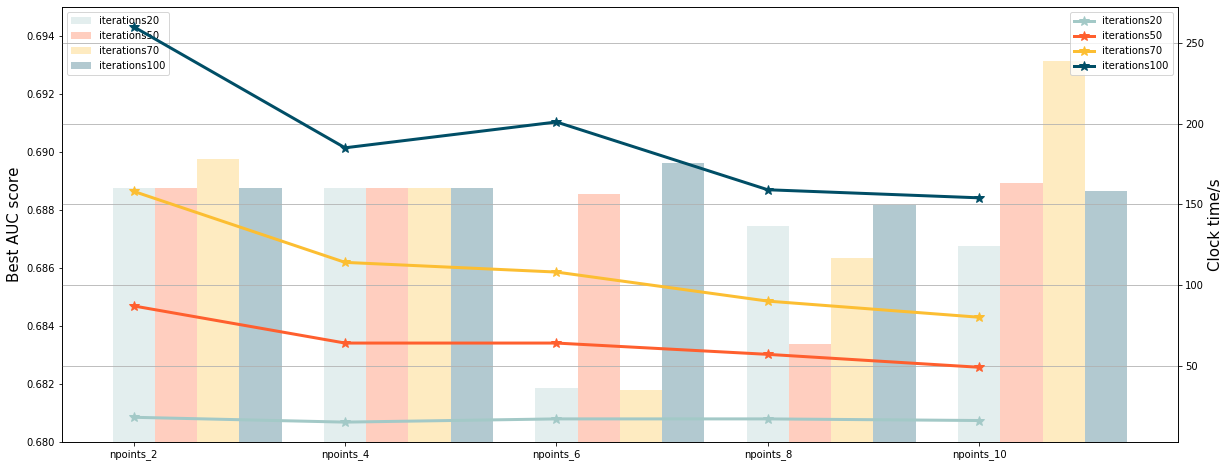

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
width = 0.2

y = range(1,6)
y = np.arange(len(y)) 
ax.bar(y,x_1,width,alpha = 0.3,label="iterations20",color="#a3c9c7")#,color='grey', edgecolor='black'
ax.bar(y+width,x_2,width,alpha = 0.3,label="iterations50",color="#ff5f2e")
ax.bar(y+2*width,x_3,width,alpha = 0.3,label="iterations70",color="#fcbe32")
ax.bar(y+3*width,x_4,width,alpha = 0.3,label="iterations100",color="#004e66")
ax.set_xticks(y +width/2)
ax.set_ylim((0.680, 0.695))
ax.set_ylabel('Best AUC score',fontsize='15')
ax.set_xticks([])
ax.legend()
fig.show()
ax2 = ax.twinx()
ax2.plot(t_20['npoints'],t_20['clock_time'], label="iterations20",marker='*',ms=10,lw=3,color="#a3c9c7")
ax2.plot(t_50['npoints'],t_50['clock_time'],label="iterations50",marker ="*",ms=10,lw=3,color="#ff5f2e")
ax2.plot(t_70['npoints'],t_70['clock_time'],label="iterations70",marker ="*",ms=10,lw=3,color="#fcbe32")
ax2.plot(t_100['npoints'],t_100['clock_time'],label="iterations100",marker ="*",ms=10,lw=3,color="#004e66")
ax2.set_ylabel('Clock time/s',fontsize='15')
ax2.set_xlabel('n-points')
ax2.grid()
ax2.legend()
fig.show()
fig.savefig(dataset+'_compare_npoints_time.png', dpi=fig.dpi)


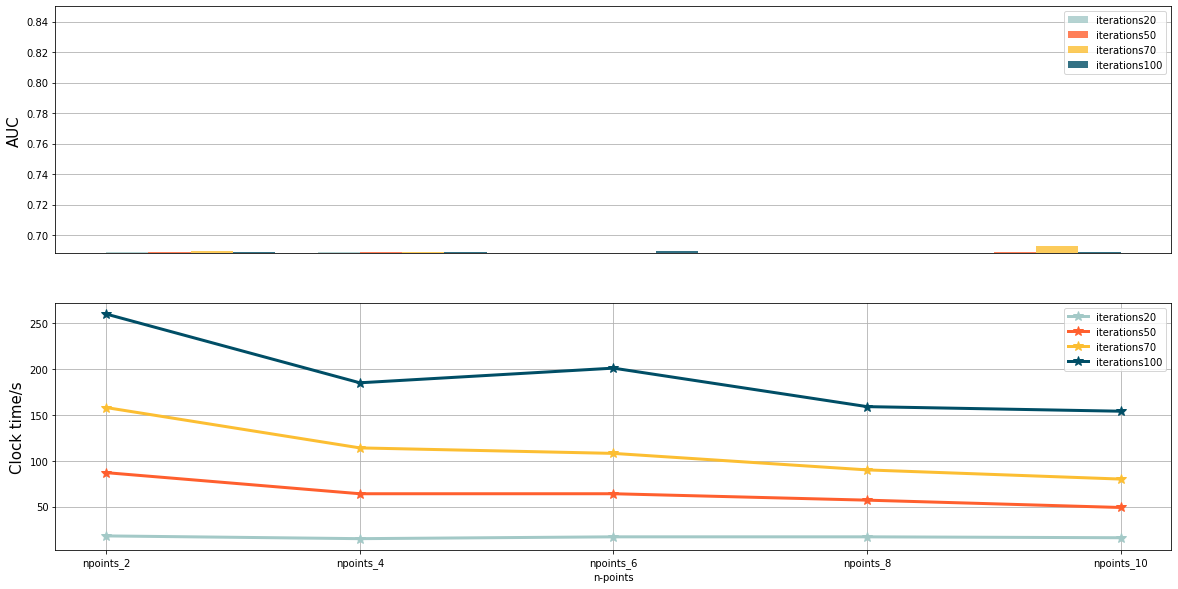

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
width = 0.2
y = range(1,6)
y = np.arange(len(y)) 
ax.bar(y,x_1,width,alpha = 0.8,label="iterations20",color="#a3c9c7")#,color='grey', edgecolor='black'
ax.bar(y+width,x_2,width,alpha = 0.8,label="iterations50",color="#ff5f2e")
ax.bar(y+2*width,x_3,width,alpha =0.8,label="iterations70",color="#fcbe32")
ax.bar(y+3*width,x_4,width,alpha = 0.8,label="iterations100",color="#004e66")
ax.set_xticks(y +width/2)
ax.set_ylim((0.688, 0.85))
ax.set_ylabel('AUC',fontsize='15')
ax.set_xticks([])
ax.legend()
ax.grid()


ax2 = fig.add_subplot(212) 
ax2.plot(t_20['npoints'],t_20['clock_time'], label="iterations20",marker='*',ms=10,lw=3,color="#a3c9c7")
ax2.plot(t_50['npoints'],t_50['clock_time'],label="iterations50",marker ="*",ms=10,lw=3,color="#ff5f2e")
ax2.plot(t_70['npoints'],t_70['clock_time'],label="iterations70",marker ="*",ms=10,lw=3,color="#fcbe32")
ax2.plot(t_100['npoints'],t_100['clock_time'],label="iterations100",marker ="*",ms=10,lw=3,color="#004e66")
ax2.set_ylabel('Clock time/s',fontsize='15')
ax2.legend()
ax2.set_xlabel('n-points')
ax2.grid()
fig.show()
#fig.savefig(DIRS['output']+'auc_compare_npoints.png', dpi=fig.dpi)


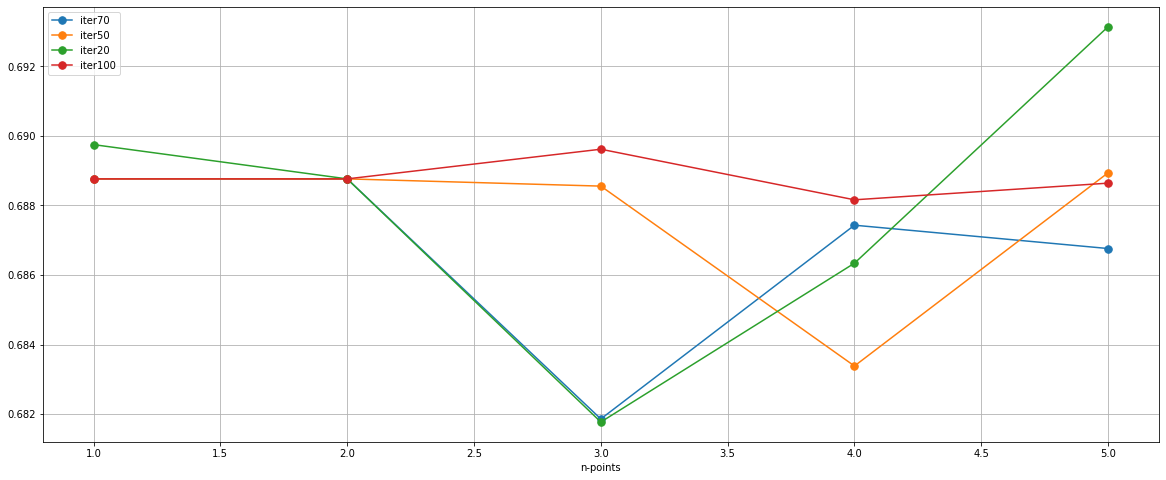

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)


y = range(1,6)
p = ax.plot(y,x_1,label="iter70",marker =".",markersize = 15)
p_2 = ax.plot(y,x_2,label="iter50" ,marker ="." ,markersize = 15)
p_3 = ax.plot(y,x_3,label="iter20" ,marker =".",markersize = 15)
p_4 = ax.plot(y,x_4,label="iter100" ,marker =".",markersize = 15)
ax.set_xlabel('n-points')
plt.grid()
plt.legend()
fig.show()
#fig.savefig(DIRS['output']+'auc_compare_npoints.png', dpi=fig.dpi)

In [73]:
from util import dump_result,load_result
import pandas as pd
#np_results =load_result("jm1_parallel_np_5f_40_eips_20190720211433.json")

np_results=np_results_70
score = []
for k in np_results.keys():
    bests = pd.DataFrame()
    for key in np_results[k].keys():
        if np_results[k][key]['best_score'] == max(d['best_score'] for d in np_results[k].values()):
            bests = bests.append({'best_score': np_results[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': np_results[k][key]['Time_cost']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    #print(np_results[k][best_base_estimator]['best_score'])
    score.append(np_results[k][best_base_estimator]['best_score'])

re =np_results_50
score_2 = []
for k in re.keys():
    bests = pd.DataFrame()
    for key in re[k].keys():
        if re[k][key]['best_score'] == max(d['best_score'] for d in re[k].values()):
            bests = bests.append({'best_score': re[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re[k][key]['Time_cost']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_2.append(re[k][best_base_estimator]['best_score'])

    
re_20 =np_results_20
score_3 = []
for k in re_20.keys():
    bests = pd.DataFrame()
    for key in re_20[k].keys():
        if re_20[k][key]['best_score'] == max(d['best_score'] for d in re_20[k].values()):
            bests = bests.append({'best_score': re_20[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re_20[k][key]['Time_cost']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_3.append(re_20[k][best_base_estimator]['best_score'])
    

re_100 =np_results_100
score_4 = []
for k in re_100.keys():
    bests = pd.DataFrame()
    for key in re_100[k].keys():
        if re_100[k][key]['best_score'] == max(d['best_score'] for d in re_100[k].values()):
            bests = bests.append({'best_score': re_100[k][key]['best_score'],
                                  'best_SM': key,
                                  'time': re_100[k][key]['Time_cost']}, ignore_index=True)
            bests.sort_values(by=['time'])
            best_base_estimator = bests['best_SM'][0]
    score_4.append(re_100[k][best_base_estimator]['best_score'])

